In [1]:
import keras 
from keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
import os

#### Tworzenie katalogów oraz zbiorów: treningowych, testowych, validacyjnych 

In [2]:
directory_train = "train_data"
directory_val = "vaildation_data"
directory_test = "test_data"

In [3]:
dirs = "C:/Users/Grzegorz Mróz/Desktop/data"

In [8]:
# tworzenie katalogów train, vali, test
path_1 = os.path.join(dirs, directory_train)
os.mkdir(path_1)
path_2 = os.path.join(dirs, directory_val)
os.mkdir(path_2)
path_3 = os.path.join(dirs, directory_test)
os.mkdir(path_3)

In [9]:
list_dir = ["0","A","B","C"]

In [10]:
## tworzenie podkatalogów z nazwami klasy 
for link, folders, files in os.walk(dirs):
    for folder in folders:
        if folder.endswith("data"):
            name_path = os.path.join(link, folder)
            for i in list_dir:
                path = os.path.join(name_path, i)
                os.mkdir(path)                               

In [4]:
import shutil

In [11]:
## kopiowanie obrazów do odpowiednich podkatalogów (80%- train, 10%-vali, 10%-test)
# 300 * 0,8 = 240 train_set
# 30 - vali_set
# 30 - test_set
for i in range(240):    
    src = dirs+"/0/"+str(i)+".jpg"
    des = dirs+"/train_data/0"
    shutil.copy(src, des)
    
    src = dirs+"/A/"+str(i)+".jpg"
    des = dirs+"/train_data/A"
    shutil.copy(src, des)
    
    src = dirs+"/B/"+str(i)+".jpg"
    des = dirs+"/train_data/B"
    shutil.copy(src, des)
    
    src = dirs+"/C/"+str(i)+".jpg"
    des = dirs+"/train_data/C"
    shutil.copy(src, des)
    

In [12]:
for i in range(240,270):
    src = dirs+"/0/"+str(i)+".jpg"
    des = dirs+"/vaildation_data/0"
    shutil.copy(src, des)
    
    src = dirs+"/A/"+str(i)+".jpg"
    des = dirs+"/vaildation_data/A"
    shutil.copy(src, des)
    
    src = dirs+"/B/"+str(i)+".jpg"
    des = dirs+"/vaildation_data/B"
    shutil.copy(src, des)
    
    src = dirs+"/C/"+str(i)+".jpg"
    des = dirs+"/vaildation_data/C"
    shutil.copy(src, des)

In [13]:
for i in range(270,300):
    src = dirs+"/0/"+str(i)+".jpg"
    des = dirs+"/test_data/0"
    shutil.copy(src, des)
    
    src = dirs+"/A/"+str(i)+".jpg"
    des = dirs+"/test_data/A"
    shutil.copy(src, des)
    
    src = dirs+"/B/"+str(i)+".jpg"
    des = dirs+"/test_data/B"
    shutil.copy(src, des)
    
    src = dirs+"/C/"+str(i)+".jpg"
    des = dirs+"/test_data/C"
    shutil.copy(src, des)

In [5]:
#ścieżki do katalogów
train_dir = dirs+"/train_data"
vali_dir = dirs+"/vaildation_data"
test_dir = dirs+"/test_data"


#### augmentacja z pomocą funkcji w kerasie ImageDataGenerator, zbiór testowy musi zostać orginalny

In [6]:
train_datagen = ImageDataGenerator(
    rescale=1./255, # skalowanie danych
    rotation_range =40, # losowy obrót obrazu w zakresie 0-180 st.
    width_shift_range=0.2, # wskzauje rozmiar ramy w której przekształca sie obraz, poziom
    height_shift_range=0.2, # wskzauje rozmiar ramy w której przekształca sie obraz, pion
    shear_range=0.2,# zakres losowego przycinania obrazu
    zoom_range=0.2,# zakres losowego przyblizania fragmentów obrazu
    horizontal_flip=True,# losowe odbicie połowy obrazu w poziomie
    fill_mode= 'nearest' # wypełnienie nowo powstałych pikseli, przez obród lub przesuniecie
)
test_datagen = ImageDataGenerator(rescale=1./255)

#### na postawie dnaych z geratora używam funcji która wyszykuje klasy i nadaje etykiety na podstawie katalogów

In [7]:
train_generator = train_datagen.flow_from_directory(
    train_dir, # katalog do przeskalowania
    target_size=(150,150), #zmienia rozdzielczość obrazów 150x150
    batch_size=20, # rozmiar grupy wsadu
    class_mode='categorical' # problem klasyfikacji wieloklasowej (one hot encoder)
)

Found 960 images belonging to 4 classes.


In [15]:
validation_generator = test_datagen.flow_from_directory(
    vali_dir,
    target_size=(150,150), 
    batch_size=20,
    class_mode='categorical'
)

Found 120 images belonging to 4 classes.


In [8]:
test_generator = test_datagen.flow_from_directory(test_dir, 
                                                 target_size=(150,150),
                                                 batch_size=20,
                                                 class_mode='categorical')

Found 120 images belonging to 4 classes.


In [72]:
test_generator_metrics = test_datagen.flow_from_directory(test_dir, 
                                                 target_size=(150,150),
                                                 batch_size=120,
                                                 class_mode='categorical')

Found 120 images belonging to 4 classes.


In [9]:
for target, label in train_generator:
    print("kształt danych:",target.shape)
    print("kształt labelek:",label.shape)
    break

##generator zwaraca w nieskończoność wsady danych i ich etykiety dlatego trzeba używać "break"!

kształt danych: (20, 150, 150, 3)
kształt labelek: (20, 4)


#### Układam sieć z danymi wejściowymi zgodymi z przetworzonymi przez generator 

In [10]:
from keras import Sequential
from keras import layers

In [24]:
# sieć zawiera warstwy konwolucyjne, wartswe flatten, Dropout i jedną Gestą jak w poleceniu 
model = Sequential()
model.add(layers.Conv2D(32,(3,3),activation='relu', input_shape=(150,150,3)))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(64,(3,3), activation='relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(128,(3,3), activation='relu'))
model.add(layers.MaxPooling2D(2,2))

model.add(layers.Flatten())
model.add(layers.Dropout(0.5)) 
model.add(layers.Dense(128, activation="relu"))
model.add(layers.Dense(4, activation="softmax"))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 17, 17, 128)     

In [12]:
from keras import optimizers

In [25]:
## kompilowanie modelu, ustawianie: funkcji straty, learning reatu = 0.0001 i metryki jak w poleceniu
model.compile(loss="categorical_crossentropy",
             optimizer=keras.optimizers.RMSprop(learning_rate=1e-4),
             metrics=['acc'])

In [26]:
history = model.fit(train_generator,
                             epochs=80,
                             validation_data=validation_generator)

# model.save("alfatbet_braille_'a.h5")zapisywanie modelu 

Epoch 1/80
48/48 [==============================] - 15s 308ms/step - loss: 1.1824 - acc: 0.5010 - val_loss: 0.7979 - val_acc: 0.5500
Epoch 2/80
48/48 [==============================] - 15s 306ms/step - loss: 0.8217 - acc: 0.6552 - val_loss: 0.6954 - val_acc: 0.5583
Epoch 3/80
48/48 [==============================] - 15s 304ms/step - loss: 0.6493 - acc: 0.7281 - val_loss: 0.6074 - val_acc: 0.6417
Epoch 4/80
48/48 [==============================] - 15s 305ms/step - loss: 0.5530 - acc: 0.7865 - val_loss: 0.6373 - val_acc: 0.6667
Epoch 5/80
48/48 [==============================] - 15s 312ms/step - loss: 0.4754 - acc: 0.8010 - val_loss: 0.4858 - val_acc: 0.7333
Epoch 6/80
48/48 [==============================] - 15s 307ms/step - loss: 0.3902 - acc: 0.8417 - val_loss: 0.5801 - val_acc: 0.5750
Epoch 7/80
48/48 [==============================] - 15s 310ms/step - loss: 0.3385 - acc: 0.8708 - val_loss: 0.8274 - val_acc: 0.5750
Epoch 8/80
48/48 [==============================] - 15s 313ms/step - 

In [17]:
import matplotlib.pyplot as plt

#### wizualizacja trenowania przy uwzględnieniu stary walidacji i dokładności walidacji 

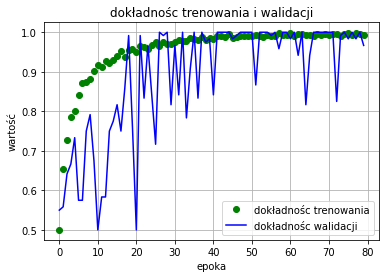

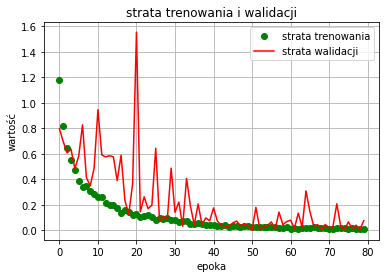

In [27]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'go', label = "dokładnośc trenowania")
plt.plot(epochs, val_acc, 'b', label = "dokładnośc walidacji")
plt.title("dokładnośc trenowania i walidacji")
plt.xlabel('epoka')
plt.ylabel('wartość')
plt.legend()
plt.grid()
plt.figure()

plt.plot(epochs, loss, 'go', label = "strata trenowania")
plt.plot(epochs, val_loss, 'r', label = "strata walidacji")
plt.title("strata trenowania i walidacji")
plt.xlabel('epoka')
plt.ylabel('wartość')
plt.legend()
plt.grid()

plt.show()


#### Mierzenie dokładności i sprawdzanie predykcji modelu 

In [132]:
import numpy as np
from keras import metrics

In [133]:
evaluate = model.evaluate(test_generator)

6/6 [==============================] - 0s 69ms/step - loss: 0.0307 - acc: 0.9917


In [134]:
print("błąd modelu na zbiorze testowym:", round(evaluate[0]*100), "%")
print("dokładność modelu na zbiorze testowym:", round(evaluate[1]*100), "%")

błąd modelu na zbiorze testowym: 3 %
dokładność modelu na zbiorze testowym: 99 %


In [135]:
# klasy z odpowiednimi labelkami 
class_img = train_generator.class_indices
class_img

{'0': 0, 'A': 1, 'B': 2, 'C': 3}

1/1 [==============================] - 0s 82ms/step
klasa przeiwdywanej labelki: 2
labelka właściwa: [0. 0. 1. 0.]
obraz litery B:


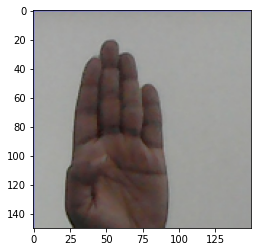

klasa przeiwdywanej labelki: 1
labelka właściwa: [0. 1. 0. 0.]
obraz litery A:


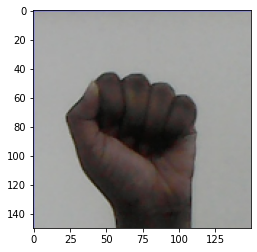

klasa przeiwdywanej labelki: 0
labelka właściwa: [1. 0. 0. 0.]
brak litery:


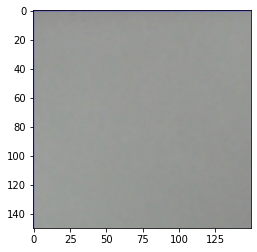

klasa przeiwdywanej labelki: 2
labelka właściwa: [0. 0. 1. 0.]
obraz litery B:


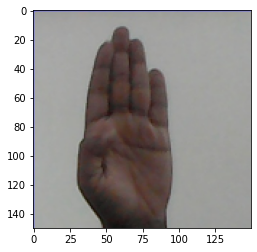

klasa przeiwdywanej labelki: 2
labelka właściwa: [0. 0. 1. 0.]
obraz litery B:


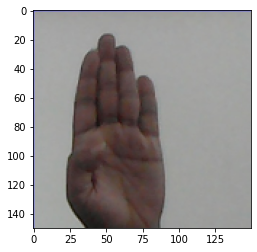

klasa przeiwdywanej labelki: 0
labelka właściwa: [1. 0. 0. 0.]
brak litery:


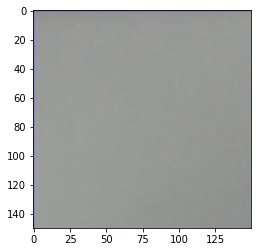

klasa przeiwdywanej labelki: 2
labelka właściwa: [0. 0. 1. 0.]
obraz litery B:


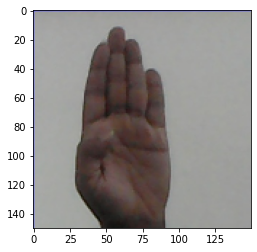

klasa przeiwdywanej labelki: 0
labelka właściwa: [1. 0. 0. 0.]
brak litery:


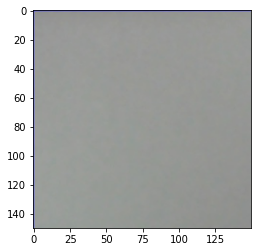

klasa przeiwdywanej labelki: 3
labelka właściwa: [0. 0. 0. 1.]
obraz litery C:


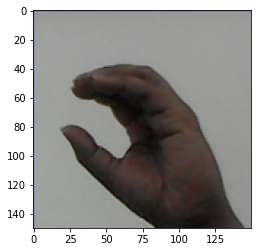

klasa przeiwdywanej labelki: 3
labelka właściwa: [0. 0. 0. 1.]
obraz litery C:


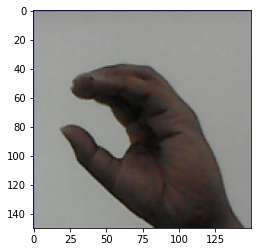

klasa przeiwdywanej labelki: 3
labelka właściwa: [0. 0. 0. 1.]
obraz litery C:


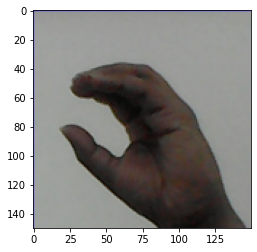

klasa przeiwdywanej labelki: 2
labelka właściwa: [0. 0. 1. 0.]
obraz litery B:


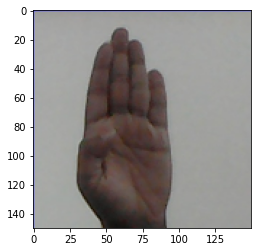

klasa przeiwdywanej labelki: 3
labelka właściwa: [0. 0. 0. 1.]
obraz litery C:


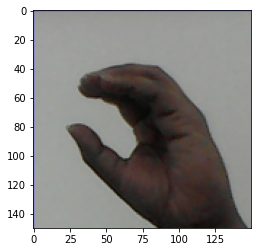

klasa przeiwdywanej labelki: 1
labelka właściwa: [0. 1. 0. 0.]
obraz litery A:


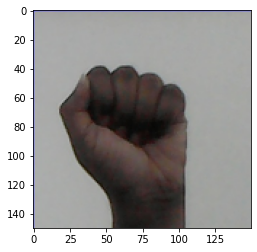

klasa przeiwdywanej labelki: 0
labelka właściwa: [1. 0. 0. 0.]
brak litery:


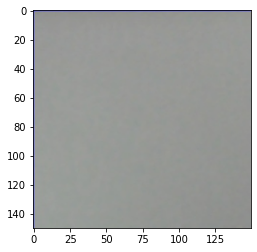

klasa przeiwdywanej labelki: 0
labelka właściwa: [1. 0. 0. 0.]
brak litery:


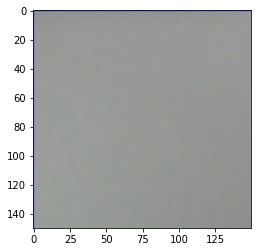

klasa przeiwdywanej labelki: 2
labelka właściwa: [0. 0. 1. 0.]
obraz litery B:


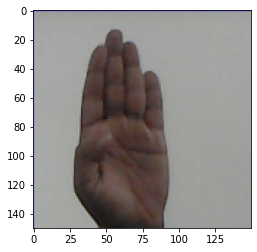

klasa przeiwdywanej labelki: 2
labelka właściwa: [0. 0. 1. 0.]
obraz litery B:


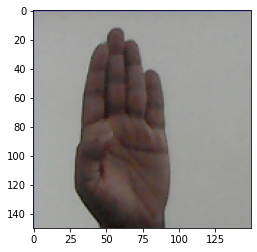

klasa przeiwdywanej labelki: 3
labelka właściwa: [0. 0. 0. 1.]
obraz litery C:


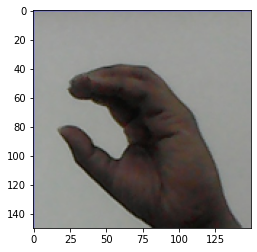

klasa przeiwdywanej labelki: 0
labelka właściwa: [1. 0. 0. 0.]
brak litery:


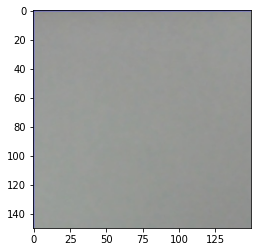

In [166]:
target, label = test_generator.next()
# przewidywania modelu 
prediction = model.predict(target)
prediction = np.argmax(prediction, axis=1)
label_prediction =prediction

for i,x,y,z in zip(label_prediction, 
                   label, 
                   target, 
                   range(20)):
    if i == 3:
        print("klasa przeiwdywanej labelki:", i)
        print("labelka właściwa:",x)
        print("obraz litery: C")
        plt.imshow(target[z])
        plt.show()
    elif i == 2:
        print("klasa przeiwdywanej labelki:", i)
        print("labelka właściwa:",x)
        print("obraz litery: B")
        plt.imshow(target[z])
        plt.show()
    elif i == 1:
        print("klasa przeiwdywanej labelki:", i)
        print("labelka właściwa:",x)
        print("obraz litery: A")
        plt.imshow(target[z])
        plt.show()
    elif i == 0:
        print("klasa przeiwdywanej labelki:", i)
        print("labelka właściwa:",x)
        print("brak litery")
        plt.imshow(target[z])
        plt.show()
        
    else: print(ProcessLookupError,"Unhandled Picture !")



In [48]:

from keras.utils import to_categorical

In [151]:
target_, label_= test_generator_metrics.next()
label_prediction_ = model.predict(target_)
label_prediction_ = np.argmax(label_prediction_, axis=1)
list_label_y = []
list_label_x = []
label_categorc = to_categorical(label_prediction_, num_classes=4, dtype="float32")
for elements in label_:
    for elemant in elements:
        list_label_x.append(elemant)

for elements in label_categorc:
    for elemant in elements:
        list_label_y.append(elemant)

4/4 [==============================] - 0s 94ms/step


In [51]:
# precision i recall oczekują tych samych danych wejściowych dlatego sprwadzam predykcje do One Hot Encoder

In [153]:
precision = keras.metrics.Precision()
precision.update_state(list_label_x, list_label_y)
precision = precision.result().numpy()
precision

0.9916667

In [154]:
recall = keras.metrics.Recall()
recall.update_state(list_label_x, list_label_y)
recall = recall.result().numpy()
recall

0.9916667

In [131]:
f1_score = 2*(precision*recall)/(precision+recall)
f1_score

0.9916666696719428

In [301]:
# źródła: 
# Ksiązka Uczenie maszynowe z użyciem Scikit-Learn i TnesorFlow (Aurelien Geron) 
# Ksiażka Deep Learnig praca z biblioteką Keras (Francois Chollet)
# Dokumentacja TensorFlow i Keras 
# Czasami Stackoverflow (best friend  <3)